Importação dos dados que estão presente em um repositório no Github no formato de arquivos .csv

In [1]:
import pandas as pd 
import numpy as np

In [2]:
x1 = pd.read_csv('https://github.com/ascdavia/DeepLearning_SignalProcessing-sEMG/blob/main/Database/sEMG_Basic_Hand_movements_upatras_csv_files/Database_1/df1_mov_all.csv?raw=true', compression = None)
x = x1.drop(x1.columns[0], axis=1)

In [ ]:
x = x.values.reshape(x.shape[0], x.shape[1], 1)
print(x.shape)

(900, 3000, 1)


Definição da matriz de saída *y*

In [ ]:
base = np.ones((150,1), dtype=np.int64)
mov_cyl = base*0
mov_hook = base*1
mov_lat = base*2
mov_palm = base*3
mov_spher = base*4
mov_tip = base*5

In [ ]:
mov = np.vstack([mov_cyl,mov_hook,mov_lat,mov_palm,mov_spher,mov_tip])
y = pd.DataFrame(mov)

Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_rem, y_train, y_rem = train_test_split(x, y, test_size=0.30, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_rem, y_rem, test_size=0.50, random_state=23)


CNN 1D 

In [ ]:
import keras
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import GlobalAveragePooling1D
from keras.layers import Flatten

In [ ]:
num_classes = 6

model = keras.models.Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2998, 64)          256       
                                                                 
 conv1d_1 (Conv1D)           (None, 2996, 64)          12352     
                                                                 
 flatten (Flatten)           (None, 191744)            0         
                                                                 
 dropout (Dropout)           (None, 191744)            0         
                                                                 
 dense (Dense)               (None, 6)                 1150470   
                                                                 
Total params: 1,163,078
Trainable params: 1,163,078
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
treino = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
 5/20 [======>.......................] - ETA: 5s - loss: 2.5005 - accuracy: 0.1688

KeyboardInterrupt: ignored

In [ ]:
avaliacao = model.evaluate(x_train,y_train)

20/20 [==============================] - 2s 79ms/step - loss: 0.0039 - accuracy: 1.0000


In [ ]:
from sklearn.metrics import confusion_matrix

pred = model.predict(x_test)
y_pred = pred.argmax(axis=-1)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 7  5  0  2  0  3]
 [ 4  9  2  0 10  0]
 [ 0  4 12  3  0 11]
 [ 5  1  5  3  2  7]
 [ 4  3  0  0  7  0]
 [ 0  0 11  2  1 12]]


In [ ]:
qualidade = cm.diagonal()/cm.sum(axis=1)
qualidade

array([0.41176471, 0.36      , 0.4       , 0.13043478, 0.5       ,
       0.46153846])

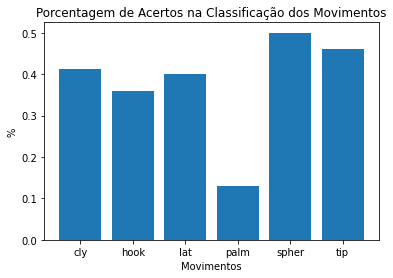

In [ ]:
import matplotlib.pyplot as plt

grupos = ['cly', 'hook', 'lat', 'palm', 'spher', 'tip']
plt.bar(grupos, qualidade)
plt.xlabel('Movimentos')
plt.ylabel('%')
plt.title('Porcentagem de Acertos na Classificação dos Movimentos')
plt.show()

In [ ]:
desvio = np.std(qualidade)
desvio

0.11909116904699533

In [ ]:
df_cm = pd.DataFrame(cm, range(6),range(6))

In [ ]:
pip install pretty_confusion_matrix

     |████████████████████████████████| 73 kB 1.3 MB/s 
     |████████████████████████████████| 103 kB 16.3 MB/s 
     |████████████████████████████████| 15.7 MB 54.4 MB/s 
     |████████████████████████████████| 191 kB 48.6 MB/s 
     |████████████████████████████████| 156 kB 55.0 MB/s 
     |████████████████████████████████| 11.3 MB 50.2 MB/s 
     |████████████████████████████████| 11.2 MB 43.0 MB/s 
     |████████████████████████████████| 843 kB 73.0 MB/s 
     |████████████████████████████████| 41 kB 598 kB/s 
     |████████████████████████████████| 68 kB 6.4 MB/s 
     |████████████████████████████████| 890 kB 63.5 MB/s 
     |████████████████████████████████| 596 kB 51.9 MB/s 
     |████████████████████████████████| 98 kB 7.6 MB/s 
     |████████████████████████████████| 6.5 MB 49.7 MB/s 
     |████████████████████████████████| 461 kB 57.5 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstall

/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:200: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:201: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:203: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:204: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be remo

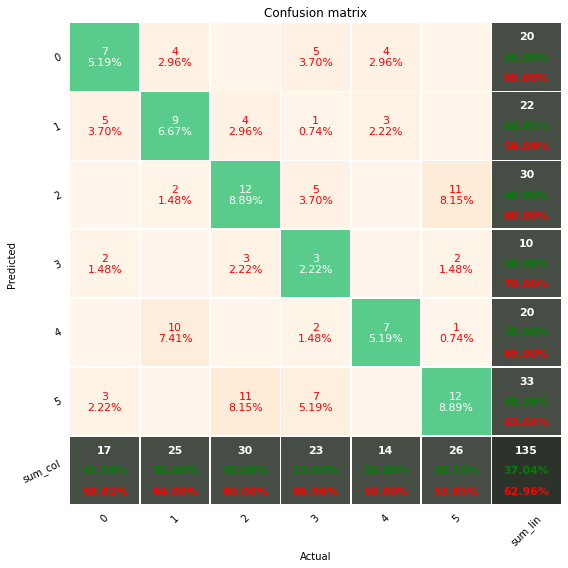

In [ ]:
import numpy as np
from pretty_confusion_matrix import pp_matrix

#pp_matrix_from_data(y_test, y_pred)
pp_matrix(df_cm)